<div class="alert alert-block alert-info">
    <h1>Análisis de Series Temporales - 2023</h1>
    <h3>Clase 2</h3>
    <h5>Ejercitacion asincronica</h5>
        <p>Docente: Rodrigo Del Rosso<p>
        <p>Asistentes: Sebastián Calcagno y Braian Drago <p>
</div>

 <h1>Esta actividad asincrónica se segmentará en dos partes. La primera implicará la interpretación de gráficos de autocorrelación, mientras que en la segunda abordaremos un ejemplo seleccionado por usted, en el cual trabajarán con algunos enunciados.</h1>

In [1]:
# IMPORTAR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import adfuller

 <h2> PRIMERA PARTE</h2>

<li type="square">Primera parte - ej - 1) Ejecutar los dos códigos a continuación y luego determinar en cada caso, en base a la grafica de autocorrelación, si las series son o no estacionarias.</li>

 <h3> CODIGO 1 </h3>

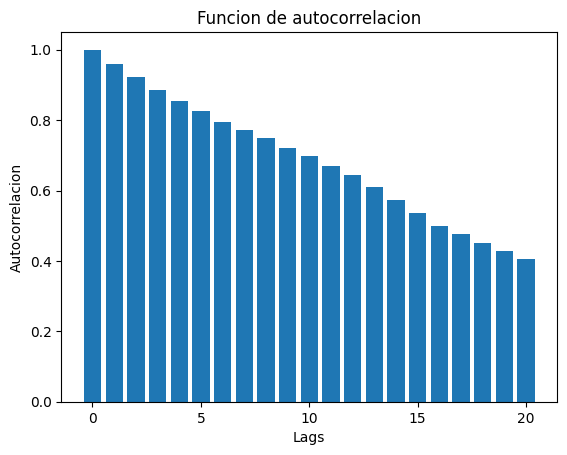

In [2]:
# CORRER EL CODIGO

# Simulacion de serie 1
np.random.seed(0)
tiempo = np.arange(0, 100)
estacionalidad = 10 * np.sin(2 * np.pi * tiempo / 12)
data_codigo_1 = 2 * tiempo + estacionalidad + np.random.randn(100) * 5

# Calculo de la función de autocorrelación
lags_maximos = 20
autocorr = acf(data_codigo_1, nlags=lags_maximos)

# Graficar de la función de autocorrelación
plt.bar(range(lags_maximos+1), autocorr)
plt.xlabel('Lags')
plt.ylabel('Autocorrelacion')
plt.title('Funcion de autocorrelacion')
plt.show()

In [ ]:
''' Escribir aqui la respuesta (¿ es o no es estacionaria? - JUSTIFICAR)

En un primer approach, 
No es estacionaria en base a la grafica de autocorrelacion ya que la caida es lineal

'''

 <h3> CODIGO 2 </h3>

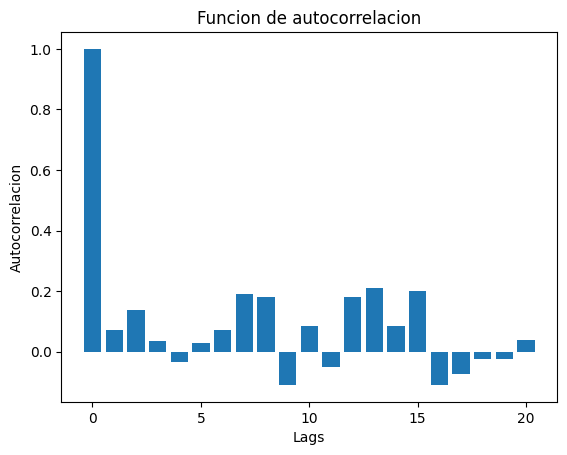

In [3]:
# CORRER EL CODIGO

# Simulacion de serie 2
np.random.seed(0)
data = np.random.randn(100)

# Calculo de la función de autocorrelación
autocorr = acf(data, nlags=lags_maximos)

# Graficar de la función de autocorrelación
plt.bar(range(lags_maximos+1), autocorr)
plt.xlabel('Lags')
plt.ylabel('Autocorrelacion')
plt.title('Funcion de autocorrelacion')
plt.show()

In [ ]:
''' Escribir aqui la respuesta (¿ es o no es estacionaria? - JUSTIFICAR)

Diriamos que es estacionaria porque la caida es exponencial
de hecho es inmediata

'''

 <h2> SEGUNDA PARTE</h2>

 Buscar un data set público de interés, descargarlo, importarlo y seguir las consignas.

<li type="square">1) Leer la base y configurar la/s variables de interes como serie/s de tiempo.</li>

In [4]:
from matplotlib import rcParams
from cycler import cycler

In [33]:
data = pd.read_csv('.\AAXJ.csv')

In [34]:
# escriba aqui su codigo
rcParams['figure.figsize']= 14, 5
rcParams['axes.spines.top']= False
rcParams['axes.spines.right']= False
rcParams['axes.prop_cycle']= cycler(color=['#CC6633'])
rcParams['lines.linewidth']= 2


In [35]:
data.Date = pd.to_datetime(data.Date, dayfirst = True)

C:\Users\waldo\AppData\Local\Temp\ipykernel_25580\2409153446.py:1: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  data.Date = pd.to_datetime(data.Date, dayfirst = True)


In [36]:
data.dtypes

Date       datetime64[ns]
Open              float64
High              float64
Low               float64
Close             float64
Volume              int64
OpenInt             int64
dtype: object

In [37]:
data.set_index('Date', inplace=True)

In [28]:
#data = data.asfreq('d')
#data.isna().sum()
#data = data.asfreq('b')
#data.isna().sum()

In [39]:
data.head(10)

,Open,High,Low,Close,Volume,OpenInt
Date,,,,,,
2008-08-15,44.886,44.886,44.886,44.886,112,0
2008-08-18,44.564,44.564,43.875,43.875,28497,0
2008-08-19,43.283,43.283,43.283,43.283,112,0
2008-08-20,43.918,43.918,43.892,43.892,4468,0
2008-08-22,44.097,44.097,44.017,44.071,4006,0
2008-08-25,44.044,44.044,43.248,43.248,18975,0
2008-08-26,43.802,43.802,43.471,43.660,5507,0
2008-08-27,44.564,44.564,44.457,44.457,1675,0
2008-08-28,44.421,44.475,44.421,44.475,6687,0




<li type="square">2) Graficar la/s variable/s en el tiempo.</li>

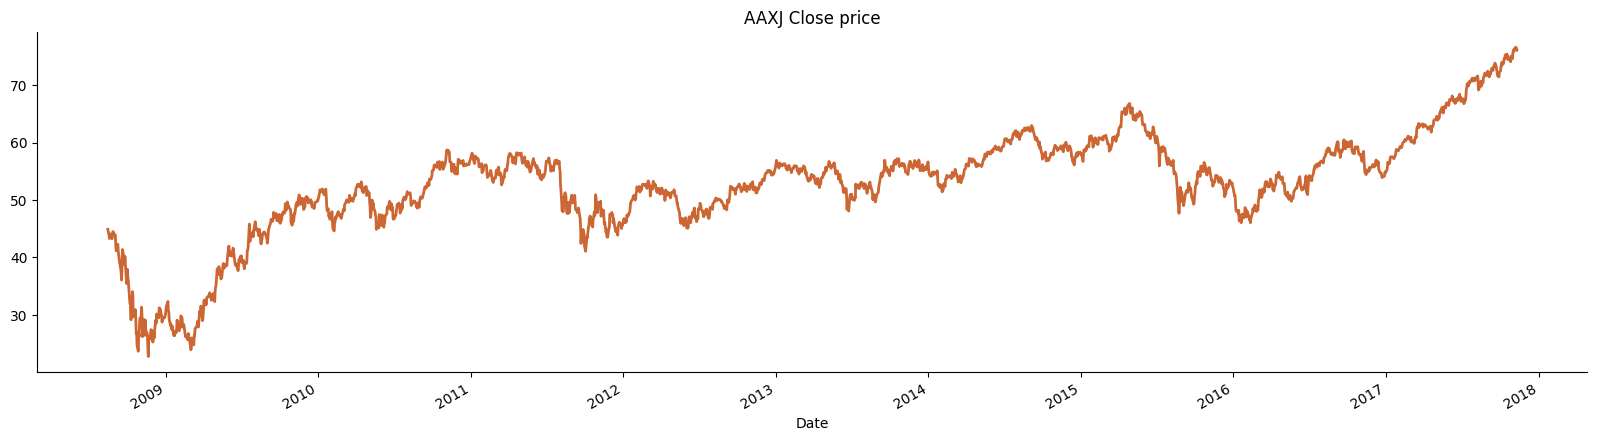

In [41]:
data.Close.plot(figsize=(20,5), title = "AAXJ Close price")
plt.show()

<li type="square">3) Graficar el Correlograma y analizar su comportamiento.</li>

In [43]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

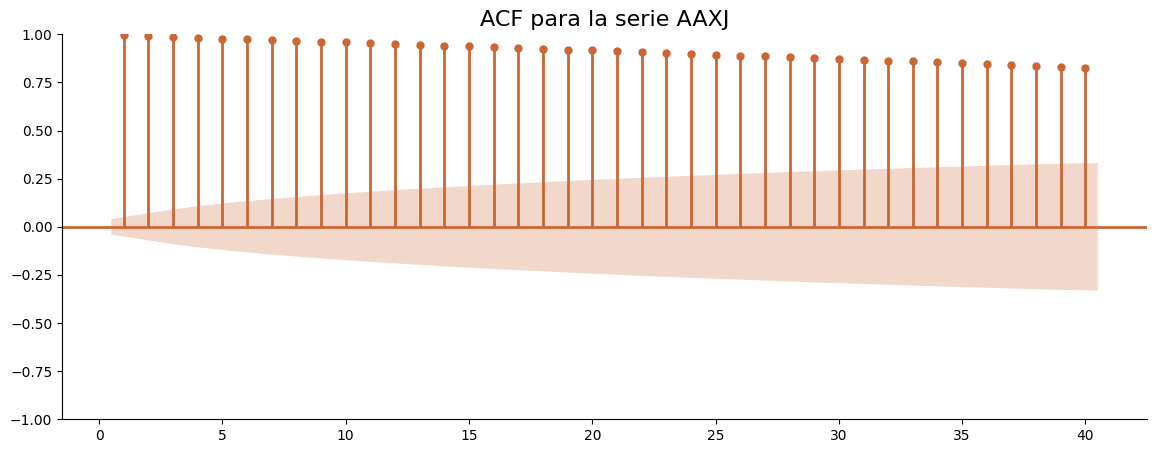

In [50]:
plot_acf(data.Close, zero = False, lags = 40)
plt.title("ACF para la serie AAXJ", size = 16)
plt.show()

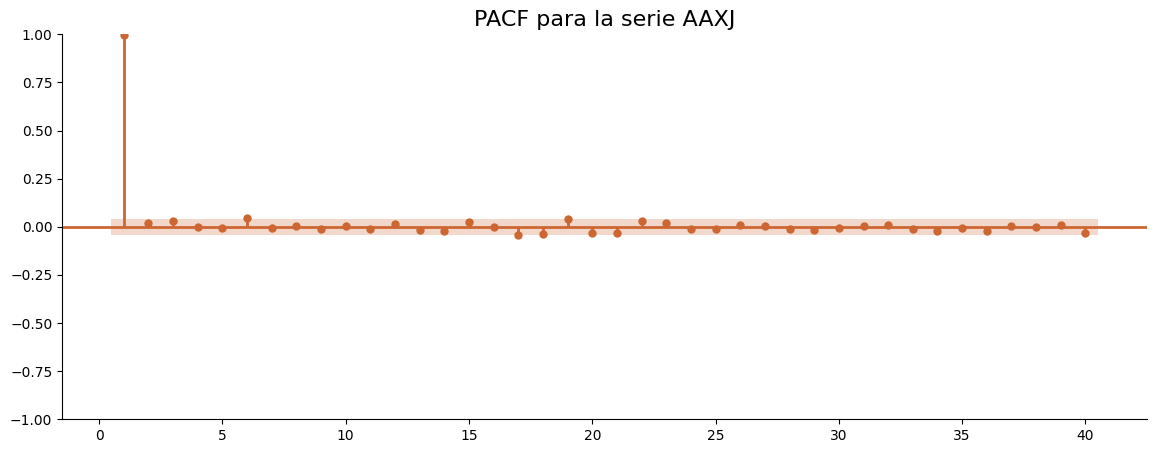

In [51]:
plot_pacf(data.Close, zero = False, lags = 40)
plt.title("PACF para la serie AAXJ", size = 16)
plt.show()

In [ ]:
'''
Analize brevemente aqui el comportamiento

El proceso parece ser un AR(1) porque en el grafico de autocorrelacion parcial se ve alto unicamente el coeficiente 1
mientras que en el grafico de autocorrelacion todos los puntos estan altos cayendo lento y linealmente

La serie a simple vista no es estacionaria y de acuerdo al grafico de autocorrelacion esto se valida

'''

In [52]:
import statsmodels.api as sm

In [72]:
model = sm.tsa.arima.ARIMA(data.Close, order=(1,0,1))
result = model.fit()
result.summary()

C:\Users\waldo\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\waldo\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\waldo\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 2325
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -2556.835
Date:                Sun, 15 Oct 2023   AIC                           5121.669
Time:                        00:05:45   BIC                           5144.675
Sample:                             0   HQIC                          5130.052
                               - 2325                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         52.7712      7.909      6.672      0.000      37.270      68.272
ar.L1          0.9982      0.001    808.917      0.000       0.996       1.001
ma.L1         -0.0471      0.016     -2.934      0.003      -0.079      -0.016
sigma2         0.5268      0.009     56.813      0.000       0.509       0.545
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              1312.44
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               0.43   Skew:                            -0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""


<li type="square">4) Realizar Estadística Descriptiva de la/s variable/s.</li>

In [ ]:
# escriba aqui su codigo





In [ ]:
'''
Escriba aqui los analisis







'''